# Kanji OCR Project - main notebook

## Load dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
import imageio.v3 as iio
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os

# KANJI START AT INDEX 71
base_path = './test'
joyo_kanji = ''
fprop = fm.FontProperties(fname='/home/notkali/fonts/YujiSyuku-Regular.ttf')

with open('joyoKanji') as f:
    joyo_kanji = f.read()
with open('rtk3') as f:
    joyo_kanji += f.read()
matplotlib.rcParams['font.family'] = 'Yuji Syuku'
matplotlib.rcParams['font.size'] = 18

2023-07-11 20:18:20.329742: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-11 20:18:20.608906: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 20:18:21.625976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load dataset

In [6]:
data = tf.keras.utils.image_dataset_from_directory('test', color_mode="grayscale", label_mode="categorical")

# characters = {}
# data, labels = np.empty((0, 200, 127, 128)), np.empty(0)
# for dir, _, filenames in os.walk(base_path):
#     if not len(filenames):
#         continue
#     character = ''
#     with open(os.path.join(dir, '.char.txt')) as namefile:
#         character = namefile.read(1)
#     filenames = [i for i in filenames if i != '.char.txt']
#     if character not in joyo_kanji:
#         continue
#     labels = np.append(labels, character)
#     char_data = np.array([iio.imread(os.path.join(dir, i)) for i in filenames])
#     characters[character] = char_data
#     data = np.concatenate((data, char_data[np.newaxis, :]), axis=0)

# # for dir, _, filenames in os.walk('./8G.zip'):
# #     if not len(filenames):
# #         continue
# #     character = ''
# #     with open(os.path.join(dir, '.char.txt')) as namefile:
# #         character = namefile.read(1)
# #     if character in '嘲嗅喩訃嬌匕楷諧曰錮恣惧憬拉曖箋傲彙踪緻毀刹璧摯貪慄辣瘍丼哺鬱羞':
# #         print(character)

# # for i, j in list(enumerate(list(labels))):
# #     print(f'{i} {j}')
# # print(characters['滅'])
# # for char in joyo_kanji:

# #     if char not in labels:
# #         print(char, end='')      
# # missing characters: 嘲嗅喩訃嬌匕楷諧曰錮恣惧憬拉曖箋傲彙踪緻毀刹璧摯貪慄辣瘍丼哺鬱羞

# print('characters loaded')
# print(labels)
# print(characters)

Found 45000 files belonging to 225 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 225), dtype=tf.float32, name=None))>

## Show data

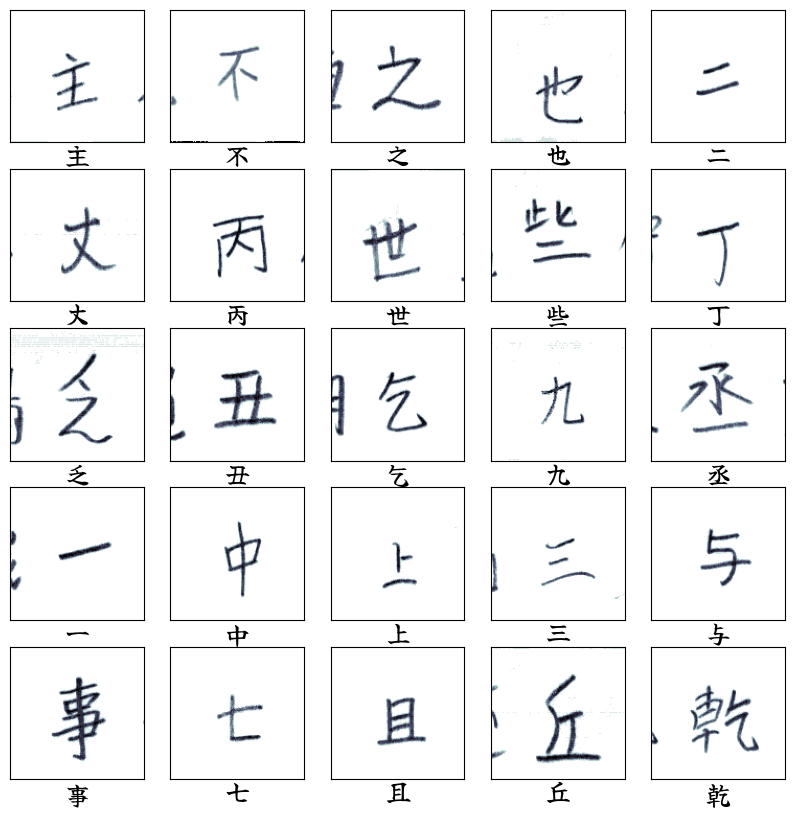

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(characters[labels[i]][0], cmap=plt.cm.bone)
    plt.xlabel(labels[i])
plt.show()

## Preprocess data

In [25]:
test_share = 0.2 # setting 2% of the dataset for testing
test_samples = int(np.floor(test_share * data.shape[1]))
print(test_samples)
print(labels.shape)
print(labels)
print(data.shape)
print(data)
train_data = data[:, test_samples:, :, :]
test_data = data[:, :test_samples, :, :]
print('train data shape:', train_data.shape)
print('test data shape:', test_data.shape)

40
(28,)
['主' '不' '之' '也' '二' '丈' '丙' '世' '些' '丁' '乏' '丑' '乞' '九' '丞' '一' '中' '上'
 '三' '与' '事' '七' '且' '丘' '乾' '下' '亜' '万']
(28, 200, 127, 128)
[[[[239. 239. 239. ... 239. 239. 239.]
   [239. 239. 239. ... 239. 239. 239.]
   [255. 255. 255. ... 255. 255. 255.]
   ...
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [239. 239. 239. ... 239. 239. 239.]]

  [[255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   ...
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]]

  [[255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   ...
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]]

  ...

  [[255. 255. 255. ... 223. 223. 223.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   

## Define the model

2023-07-11 18:38:06.859152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [28]
	 [[{{node Placeholder/_1}}]]


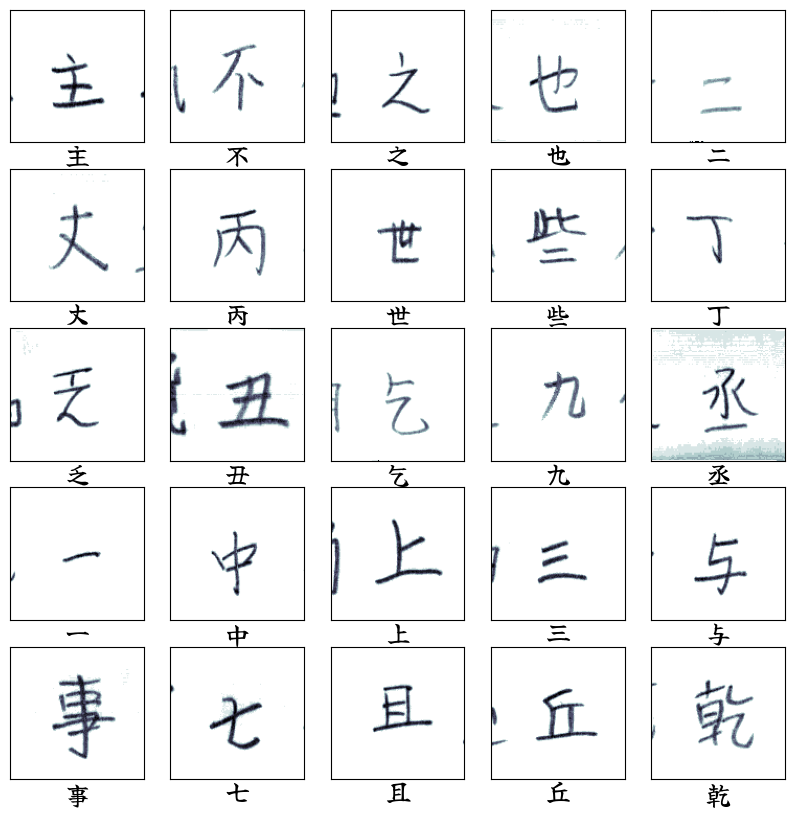

In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, labels))
items = []
for element in train_dataset:
    items.append((element[0][0], element[1]))
    # print(element[1].numpy().decode('utf8'))

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(items[i][0], cmap=plt.cm.bone)
    plt.xlabel(items[i][1].numpy().decode('utf8'))
plt.show()


## Train the model

## Run tests and export